# Intro to Probability


Probability plays a vital role in data analytics by offering a mathematical foundation to measure uncertainty, enabling informed decision-making, and evaluating the chances of different outcomes. This is essential for conducting rigorous statistical analyses and developing accurate predictive models.

## Set Theory

#### Example 1

Set theory, an important part of mathematics, studies unique groups of elements. This lays the essential groundwork for understanding probability. Grasping sets is vital for exploring the world of probability.

Lets consider two sets, A and B, where:
- A represents Students IDs who passed Mathematics
- B representes Students IDs who passed English



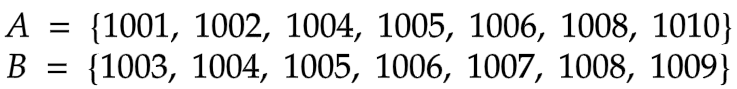

In [1]:
A = {1001, 1002, 1004, 1005, 1006, 1008, 1010}
B = {1003, 1004, 1005, 1006, 1007, 1008, 1009}

In [2]:
#Students who passed math or English or both
A.union(B)

{1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010}

In [3]:
#Students who passed both subjects
A.intersection(B)

{1004, 1005, 1006, 1008}

In [4]:
#Students who passed math but not English
A.difference(B)

{1001, 1002, 1010}

In [5]:
#Students who passed English but not math
B.difference(A)

{1003, 1007, 1009}

## Probability

### Example 2

Drawing Cards

1. What is the probability of drawing an Ace from a standard deck of 52 cards?
2. What is the probability of drawing either a red card or a Queen from a standard deck of 52 cards?
3. If you draw a card from a standard deck and it is red, what is the probability that it is a King?

In [6]:
#1. 
#S = {all 52 cards}
#A = {ace_spades, ace_hearts, ace_diamonds, aces_clubs}

# P(Ace) = 4/52

#A standard deck has 52 cards
deck = 52

#A standard deck has 4 aces
aces = 4

probability_aces = aces/deck

print(f"The probability of drawing an Ace is {probability_aces}")

The probability of drawing an Ace is 0.07692307692307693


In [12]:
#2.
#P(Red ∪ Queen) = P(Red) + P(Queen) - P(Red ∩ Queen)
#P(Red ∪ Queen) = 13/52 + 4/52 - 2/52
p_red_or_queen =   (26/52) + (4/52) - (2/52)

print(f"The probability of drawing a Queen or a red card is {p_red_or_queen}")

0.5384615384615384

In [17]:
#3.

#P(King|Red) = P(King ∩ Red) / P(Red)
p_king_after_red = (2/52) / (26/52)

print(f"The probability of drawing a King, knowing its red card is {p_king_after_red}")

The probability of drawing a King, knowing its red card is 0.07692307692307693


### Example 3

You are planning to go on a picnic today but the morning is cloudy. You hate rain so you don't know whether to go out or stay home! To help you make a decision, you gather the following data about rainy days:

- Knowing that it is a rainy day, the probability of cloudy is 50%!
- The probability of any day (rainy or not) starting off cloudy is 40%.
- This month is usually dry so only 3 of 30 days (10%) tend to be rainy.

What is the probability of rain, given the day started cloudy?

In [ ]:
# Bayes Theorem is going to be really usefull here if we have in consideration that available data

# P C|R 0.5
# P C = 0.4
# P R = 0.1

# P R|C = 0.125

## Probability Distributions

#### Discrete

##### **Binomial Distribution** - Probability of having k successes in n independent trials with individual success probability p.

Let's think about this example: 

- Before the vaccines were released by companies, the government had to contact some suppliers in order to vaccinate the entire population when the vaccines were ready. So, imagine that each company had a probability of developing the vaccine of 40%. 
- Each supplier has the capacity to develop 10,000 vaccines. 
- The population that needs to be administered the vaccine is 30,000 people

**How many suppliers should the government contract?**

Let's say the governament contracts with 10 labs. Is this enough to vacinate this 30000 people?

In [31]:
from scipy.stats import binom

n = 10
p = 0.40
binom_dist = binom(n,p)
1- binom_dist.cdf(2)

0.8327102464

With a probability of 0.83 for 3 or more labs out of those 10, successfully developing the vaccine, we should increase the number of labs to contact.
Let's see what's the probability if we contract 15 labs:

In [32]:
n = 15
p = 0.40
binom_dist = binom(n,p)
1- binom_dist.cdf(2)

0.972885999222784

We can say that if we contract 15 labs, the probability of three or more labs being successful in the development of the vaccine is now 0.97. 
Is this enough? Of course, the more labs we contract, the better. However, there are costs associated with contracting labs that we need to take into consideration

##### **Geometric Distribution** 

Suppose you are applying for jobs, and the probability of receiving an interview invitation for each job application is `p = 0.20`.
Calculate the probability of getting an interview invitation on the third job application.

In [ ]:
from scipy.stats import geom

p = 0.20
geom_dist = geom(p)

print(f"The probability to get an interview invitation exactly on the 3rd job application is {geom_dist.pmf(3)}")

The probability to get an interview invitation exactly on the 3rd jog application is 0.12800000000000003


What is the probability that they need to submit at least 5 job applications before receiving their first job offer?

In [37]:
print(f"The probability to get an interview invitation after the 5th job application is {1 - geom_dist.cdf(4)}")

The probability to get an interview invitation after the 5th job application is 0.40959999999999996


##### **Poisson Distribution**

Suppose that on average, there are 2 accidents per day at a certain intersection. 

What is the probability that there will be no accidents at the intersection tomorrow?

In [41]:
from scipy.stats import poisson

mu = 2
poisson_dist = poisson(mu)

print(f"The probability that tomorrow we dont observe an accident is {poisson_dist.pmf(0)}")

The probability that tomorrow we dont observe an accident is 0.1353352832366127


What is the probability that there will be at least 5 accidents at the intersection tomorrow?

In [43]:
print(f"The probability that tomorrow we dont observe an accident is {1 - poisson_dist.cdf(4)}")

The probability that tomorrow we dont observe an accident is 0.052653017343711195


#### Continuous

##### **Exponential Distribution**

Suppose the time (in minutes) between two consecutive arrivals at a bus stop is 10 minutes.

Calculate the probability that the time between arrivals is less than 8 minutes.

In [50]:
from scipy.stats import expon

#the parameter represents the rate of events occuring per unit of time
lambda_value = 0.1

lambda_inv = expon(scale = 1/lambda_value)

lambda_inv.cdf(8)

0.5506710358827784

Calculate the probability that the time between arrivals is more than 15 minutes.

In [54]:
print(f"The probability that the time between arrivals is more than 15 minutes is {1 - lambda_inv.cdf(15)}")

The probability that the time between arrivals is more than 15 minutes is 0.2231301601484298


##### **Normal (Gaussian) Distribution**

Suppose the heights of a population of students follow a normal distribution with a mean (μ) of 175 cm and a standard deviation (σ) of 7.5 cm . 

What is the probability that a randomly selected student is taller than 182 cm?

In [62]:
from scipy.stats import norm

mean = 175
std = 7.5

norm_dist = norm(loc = mean, scale = std)
print(f"The probability of the student's height being greater than 182 cm is {1 - norm_dist.cdf(182)}")


The probability of the student's height being greater than 182 cm is 0.17532394485222946


What is the probability that the height of a randomly selected student is between 170cm and 175cm?

In [65]:
print(f"The probability of the student's height being between 170 cm and 175 cm is {norm_dist.cdf(175) - norm_dist.cdf(170)}")


The probability of the student's height being between 170 cm and 175 cm is 0.2475074624530771


## Summary

In this lesson, we explored foundational topics in probability using some practical examples. The topics covered include basic set theory principles, fundamental probability calculations, and an introduction to both discrete and continuous probability distributions. Key concepts such as unions, intersections, probability of events, binomial and geometric distributions, as well as exponential and normal distributions, were discussed to provide a comprehensive overview of probability's role in statistical analysis and predictive modeling.